# TASK 6.5.
# Table of Contents
## 1. Import libraries and dataset
## 2. Data cleaning, wrangling and consistency checks
## 3. Data standardization
## 4. The elbow technique
## 5. K-means clustering
### 5.1. Scatterplots with the clusters
### 5.2. Clusters discussion
### 5.3. Clusters descriptive statistics
#### 5.3.1. Clusters descriptive statistics findings
### 5.4. Future steps in the analytics pipeline

---

## 1. Import libraries and dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [1]:
# Create path
path = '/Users/mariliamachado/Documents/CareerFoundry/Data Immersion/Achievement 6'

In [10]:
# Import dataset
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'Berlin_crimes_clean.csv'))

## 2. Data cleaning, wrangling and consistency checks


In [12]:
df.head()

,Unnamed: 0,Year,District,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
0,0,2012,Mitte,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,1,2012,Mitte,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2,2012,Mitte,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,3,2012,Mitte,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,4,2012,Mitte,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [18]:
df.shape

(1200, 20)

In [20]:
#Drop Unnamed column
df = df.drop(columns=['Unnamed: 0'])
df.head()

,Year,District,Location,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
0,2012,Mitte,Tiergarten Süd,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,2012,Mitte,Regierungsviertel,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,2012,Mitte,Alexanderplatz,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,2012,Mitte,Brunnenstraße Süd,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,2012,Mitte,Moabit West,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [22]:
# Drop categorical columns 
df_k = df.drop(columns=['Year', 'Location', 'District'])
df_k.head()


,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
0,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032
1,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870
2,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108
3,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752
4,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403


In [26]:
# Check basic descriptive statistics with only 2 decimals
df_k.describe().map('{:.2f}'.format)

,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior
count,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00,1200.00
mean,34.23,18.74,276.33,68.75,92.58,1492.31,42.51,215.28,197.71,69.49,15.99,6.28,281.58,62.88,97.86,662.42
std,37.09,22.17,243.70,71.11,68.46,1364.44,28.71,150.03,178.70,57.87,12.68,5.19,203.01,62.29,174.80,534.79
min,0.00,0.00,0.00,0.00,0.00,17.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10.00
25%,10.00,5.00,108.00,22.00,42.00,639.75,22.00,109.00,76.00,28.00,7.00,3.00,133.00,20.00,18.00,269.25
50%,22.00,11.00,204.50,44.00,75.00,1100.00,37.00,186.00,143.00,59.00,13.00,5.00,244.00,45.00,40.00,553.50
75%,42.00,23.00,361.00,86.00,124.00,2019.75,57.00,291.00,286.00,96.00,22.00,9.00,382.00,87.00,86.00,870.25
max,242.00,169.00,1966.00,500.00,420.00,12479.00,197.00,876.00,1288.00,446.00,74.00,31.00,1538.00,530.00,1949.00,3813.00


In [28]:
#Check duplicated values
dups = df_k.duplicated()
dups.shape

(1200,)

In [30]:
# Check missing values
df_k.isnull().sum()

Robbery                0
Street_robbery         0
Injury                 0
Agg_assault            0
Threat                 0
Theft                  0
Car_theft              0
Car_burglary           0
Bike_theft             0
Burglary               0
Fire                   0
Arson                  0
Damage                 0
Graffiti               0
Drugs_possession       0
Antisocial_behavior    0
dtype: int64

## 3. Data standardization

In [32]:
# Standardize data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(df_k)

In [34]:
# Check mean and standard deviation of scaled data
print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-3.55271368e-17 -6.51330841e-17  7.84557604e-17 -5.92118946e-18
  8.14163551e-17  1.00660221e-16 -5.62512999e-17 -2.96059473e-17
 -6.80936788e-17  7.10542736e-17  2.96059473e-17  7.99360578e-17
  8.28966525e-17  2.81256500e-17 -1.18423789e-17 -3.99680289e-17]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


## 4. The elbow technique


In [62]:
# Defines the range of potential clusters in the data
num_cl = range(1, 10)

# Defines k-means clusters in the range assigned above
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [64]:
# Creates a score that represents a rate of variation for the given cluster option
score = [kmeans[i].fit(df_k).score(df_k) for i in range(len(kmeans))] 

score

[-2821432693.264999,
 -1270510924.9288173,
 -763496766.1345608,
 -427452856.70547193,
 -309530162.9945165,
 -267169340.5955438,
 -219994958.8179902,
 -195270429.75434732,
 -181375980.8760845]

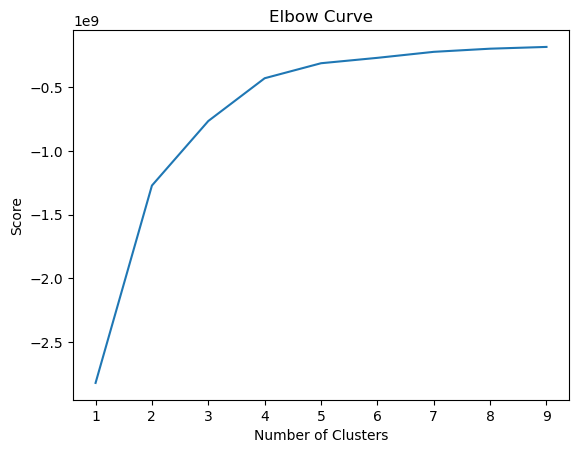

In [66]:
# Plot the elbow curve using PyLab

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

We can see in this plot that there's a jump from 3 to 4 on the x-axis, but after that, the curve straightens out. This means that the best count for the clusters is 4.

## 5. K-means clustering

In [74]:
# Create the k-means object

kmeans = KMeans(n_clusters = 4) 


In [76]:
kmeans.fit(df_k)

KMeans(n_clusters=4)

In [80]:
df_k['clusters'] = kmeans.fit_predict(df_k)

In [82]:
df_k.head()

,Robbery,Street_robbery,Injury,Agg_assault,Threat,Theft,Car_theft,Car_burglary,Bike_theft,Burglary,Fire,Arson,Damage,Graffiti,Drugs_possession,Antisocial_behavior,clusters
0,70,46,586,194,118,2263,18,328,120,68,16,4,273,26,171,1032,0
1,65,29,474,123,142,3203,10,307,170,37,10,4,380,124,98,870,0
2,242,136,1541,454,304,8988,81,792,822,275,49,27,1538,522,435,3108,1
3,52,25,254,60,66,1916,86,192,396,131,14,5,428,122,213,752,0
4,130,51,629,185,199,2470,94,410,325,161,42,22,516,64,259,1403,0


In [84]:
df_k['clusters'].value_counts()

clusters
2    722
0    361
3    109
1      8
Name: count, dtype: int64

### 5.1. Scatterplots with the clusters

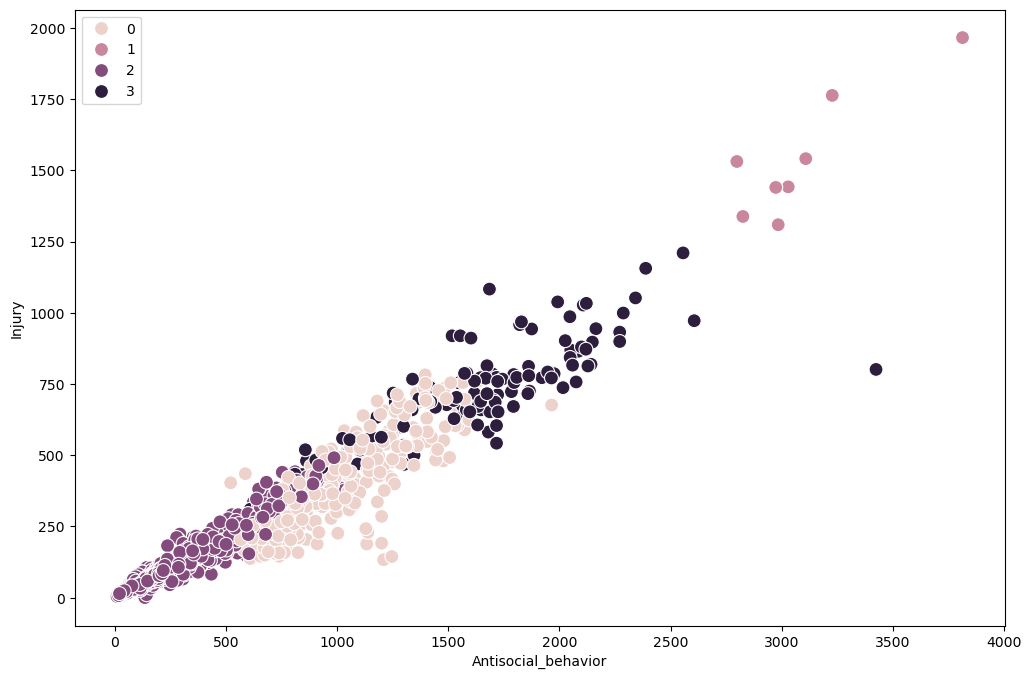

In [108]:
# Plot the clusters for the "Antisocial_behavior" and "Injury" variables

plt.figure(figsize=(12,8))
ax_Antisocial_behavior_injury = sns.scatterplot(x=df_k['Antisocial_behavior'], y=df_k['Injury'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Antisocial_behavior') 
plt.ylabel('Injury') 
plt.show()

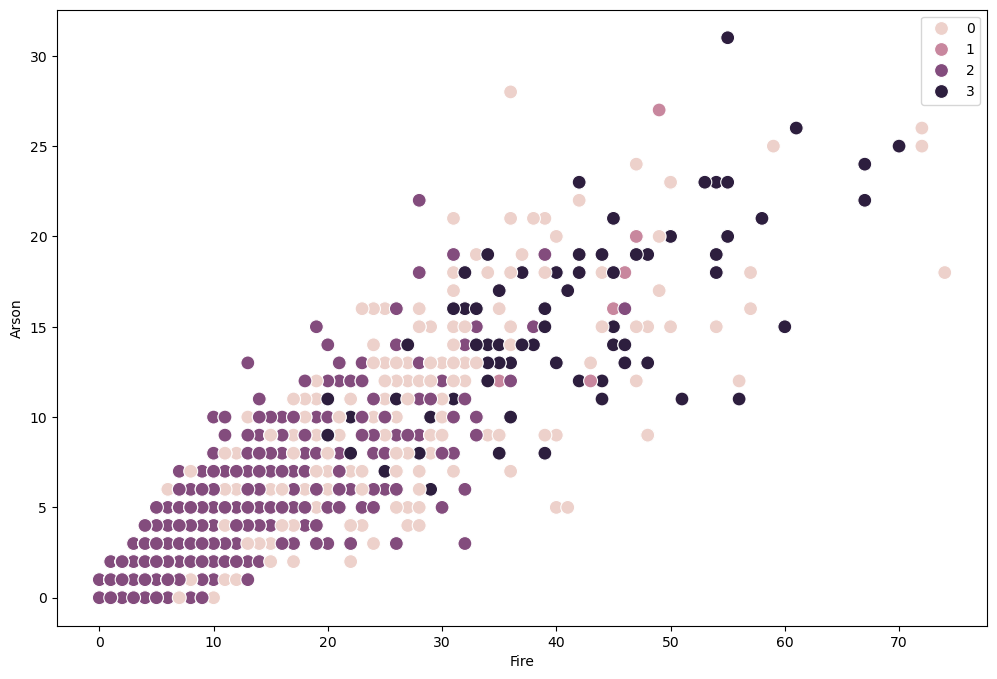

In [106]:
# Plot the clusters for the "Fire" and "Arson" variables

plt.figure(figsize=(12,8))
ax_fire = sns.scatterplot(x=df_k['Fire'], y=df_k['Arson'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Fire') 
plt.ylabel('Arson') 
plt.show()

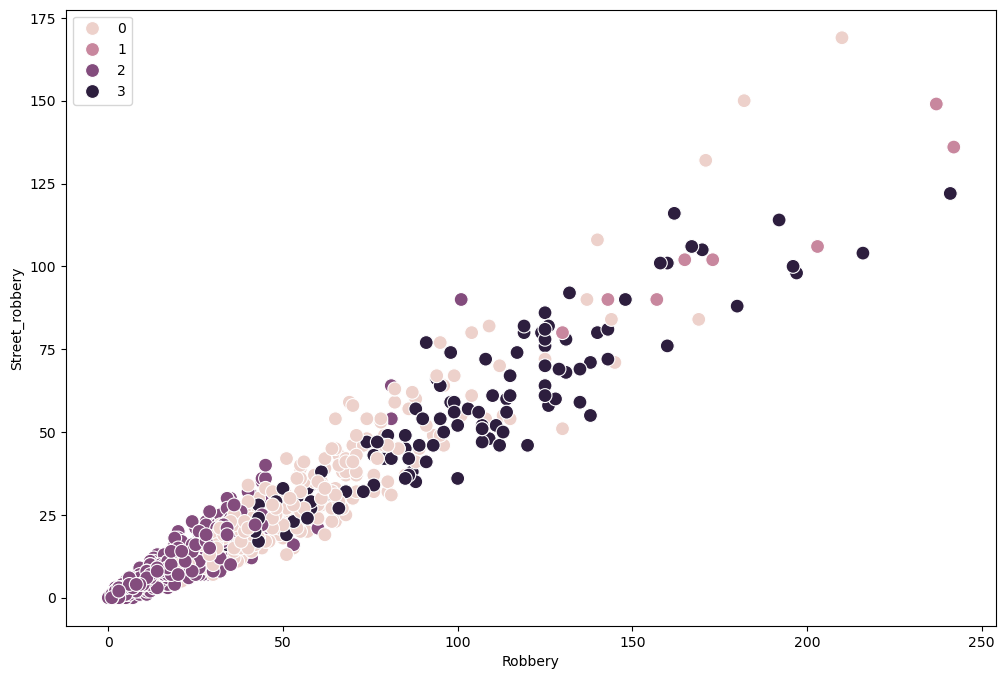

In [104]:
# Plot the clusters for the "Robbery" and "Street_robbery" variables

plt.figure(figsize=(12,8))
ax_robbery = sns.scatterplot(x=df_k['Robbery'], y=df_k['Street_robbery'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Robbery') 
plt.ylabel('Street_robbery') 
plt.show()

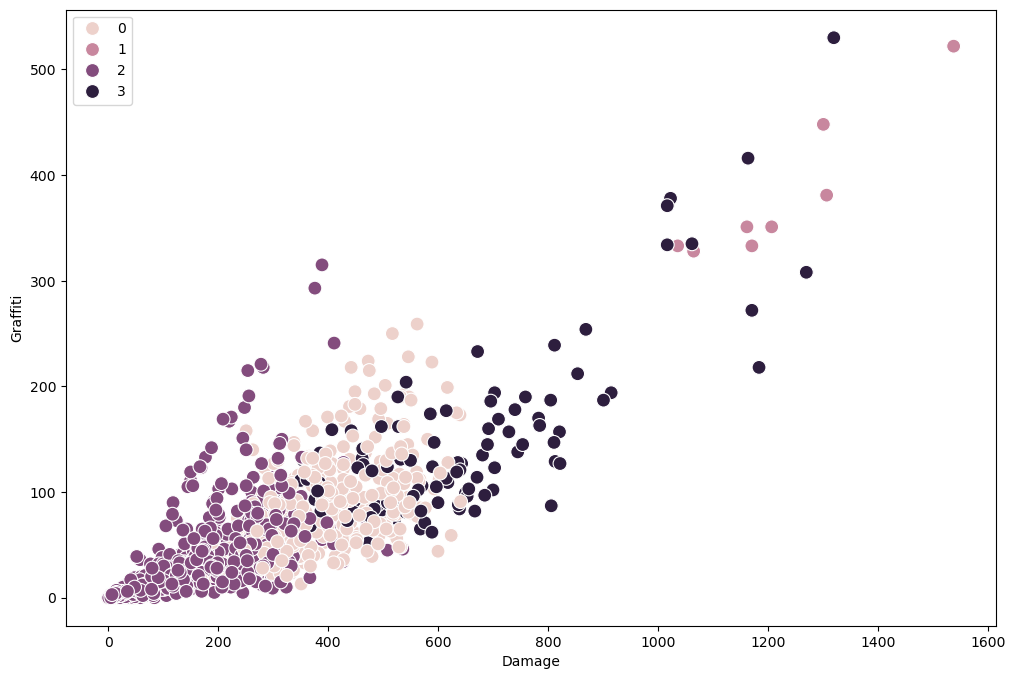

In [102]:
# Plot the clusters for the "Damage" and "Graffiti" variables

plt.figure(figsize=(12,8))
ax_damage_grffiti = sns.scatterplot(x=df_k['Damage'], y=df_k['Graffiti'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Damage') 
plt.ylabel('Graffiti') 
plt.show()

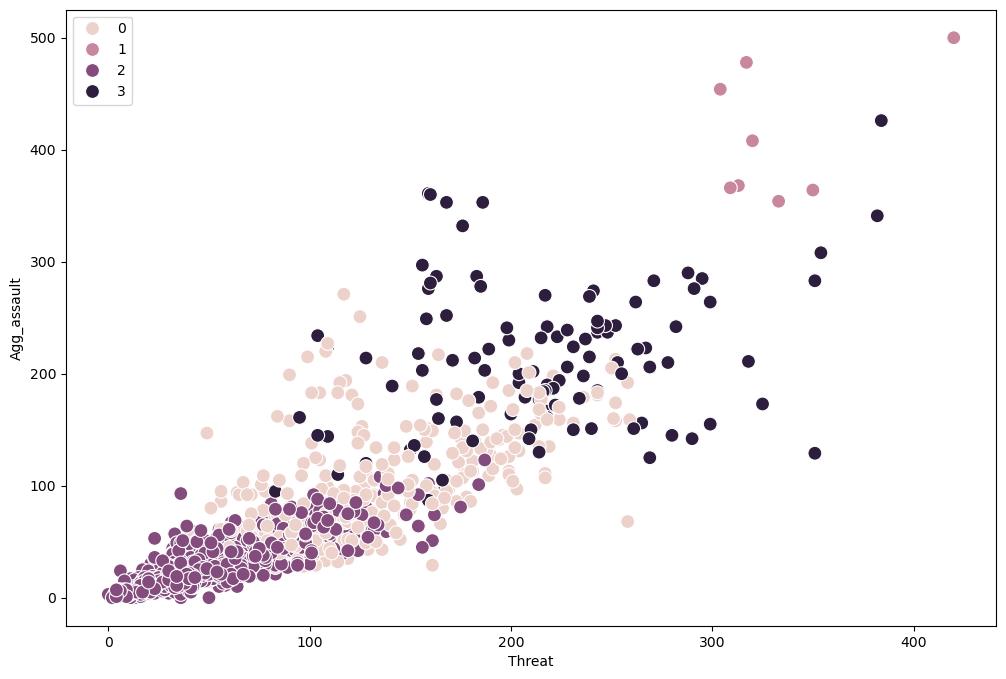

In [110]:
# Plot the clusters for the "Threat" and "Agg_assault" variables

plt.figure(figsize=(12,8))
ax_threat_aggassault = sns.scatterplot(x=df_k['Threat'], y=df_k['Agg_assault'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Threat') 
plt.ylabel('Agg_assault') 
plt.show()

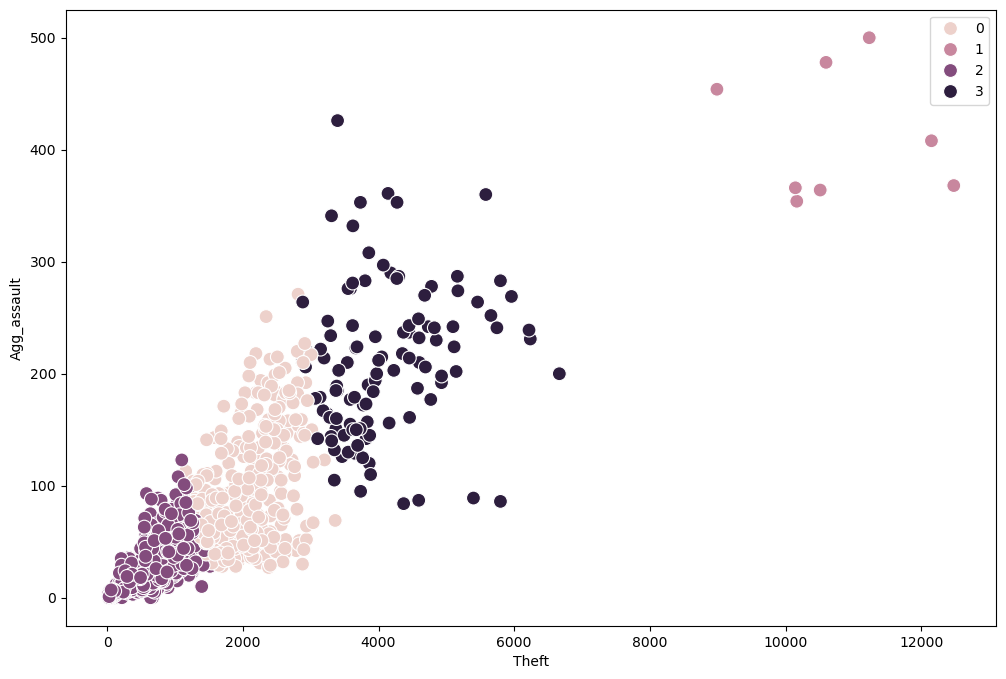

In [96]:
# Plot the clusters for the "Theft" and "Agg_assault" variables

plt.figure(figsize=(12,8))
ax = sns.scatterplot(x=df_k['Theft'], y=df_k['Agg_assault'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Theft') 
plt.ylabel('Agg_assault') 
plt.show()

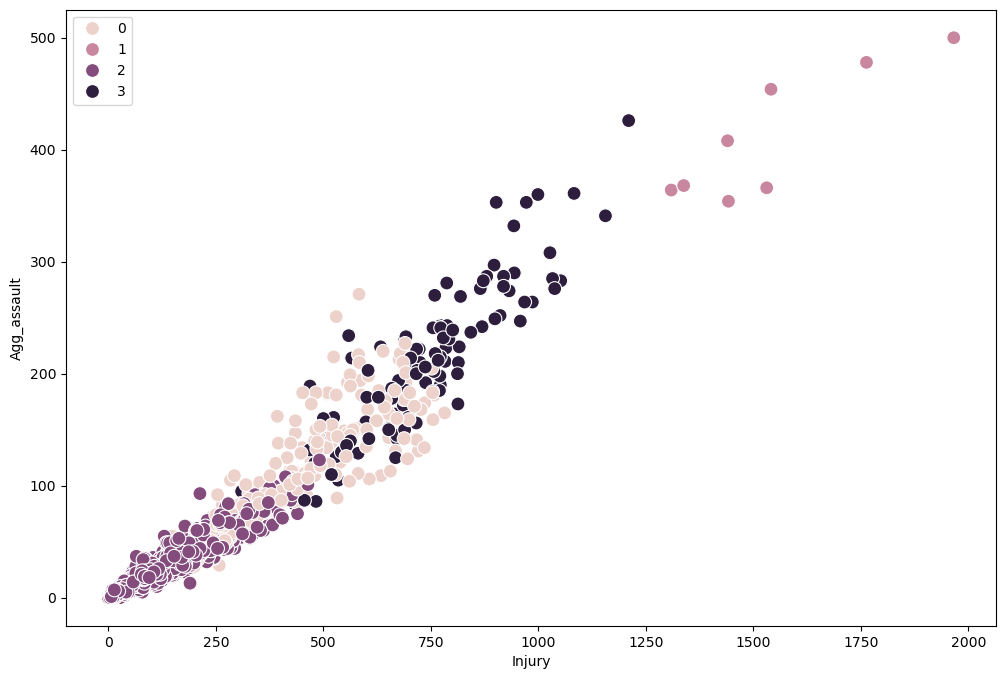

In [112]:
# Plot the clusters for the "Injury" and "Agg_assault" variables

plt.figure(figsize=(12,8))
ax_Injury_Agg_assault = sns.scatterplot(x=df_k['Injury'], y=df_k['Agg_assault'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Injury') 
plt.ylabel('Agg_assault') 
plt.show()

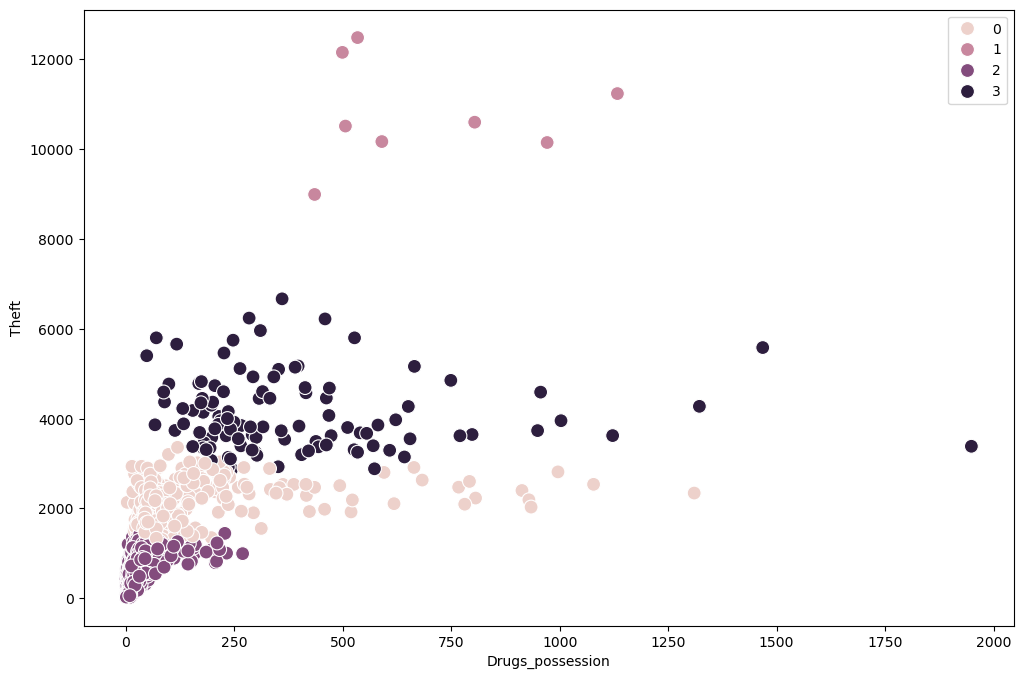

In [114]:
# Plot the clusters for the "Drugs_possession" and "Theft" variables

plt.figure(figsize=(12,8))
ax_Drugs_possession_theft = sns.scatterplot(x=df_k['Drugs_possession'], y=df_k['Theft'], hue=kmeans.labels_, s=100) 

ax.grid(False) 
plt.xlabel('Drugs_possession') 
plt.ylabel('Theft') 
plt.show()

### 5.2. Clusters discussion
The clusters make sense because most plots show a linear alignment with three clusters grouped at the lower end of the values and dispersing as values increase, indicating greater variability in higher ranges. The fourth cluster appears to represent outliers, as it consists of high-value points that are not closely grouped, highlighting their distinctiveness. This pattern suggests the clustering algorithm captured meaningful groupings aligned with the data's structure.

### 5.3. Clusters descriptive statistics

In [130]:
df_k.loc[df_k['clusters'] == 2, 'cluster'] = 'purple'
df_k.loc[df_k['clusters'] == 3, 'cluster'] = 'dark purple'
df_k.loc[df_k['clusters'] == 0, 'cluster'] = 'light pink'
df_k.loc[df_k['clusters'] == 1, 'cluster'] = 'pink'

In [132]:
df_k.groupby('cluster').agg({'Drugs_possession':['mean', 'median'], 
                         'Theft':['mean', 'median'], 
                        'Graffiti':['mean', 'median'],
                          'Threat':['mean', 'median'], 
                        'Damage':['mean', 'median'],
                          'Fire':['mean', 'median'],
                            'Arson':['mean', 'median'],
                             'Antisocial_behavior':['mean', 'median'],
                         'Injury':['mean', 'median'],
                         'Agg_assault':['mean', 'median'],
                         'Robbery':['mean', 'median'],
                          'Street_robbery':['mean', 'median']})

Drugs_possession                Theft             Graffiti         \
                        mean median          mean   median        mean median   
cluster                                                                         
dark purple       384.348624  293.0   4098.220183   3857.0  140.357798  123.0   
light pink        130.216066   71.0   2055.747922   2063.0   86.728532   80.0   
pink              684.000000  562.0  10783.125000  10553.0  380.875000  351.0   
purple             31.934903   23.0    714.228532    712.5   35.742382   26.0   

                 Threat              Damage          ... Antisocial_behavior  \
                   mean median         mean  median  ...                mean   
cluster                                              ...                       
dark purple  213.302752  216.0   625.000000   590.0  ...         1670.678899   
light pink   125.094183  118.0   389.290859   382.0  ...          944.091413   
pink         333.250000  318.5  1223.375000  1189.0  ...         3094.625000   
purple        55.436288   49.0   165.447368   152.0  ...          342.411357   

                          Injury         Agg_assault            Robbery  \
             median         mean  median        mean median        mean   
cluster                                                                   
dark purple  1674.0   736.403670   725.0  209.577982  206.0  104.889908   
light pink    862.0   373.722992   332.0   93.171745   79.0   48.387812   
pink         3006.5  1541.250000  1486.5  411.500000  388.0  181.250000   
purple        308.0   144.167590   124.0   31.480609   27.0   14.860111   

                   Street_robbery         
            median           mean median  
cluster                                   
dark purple  103.0      56.990826   54.0  
light pink    40.0      26.617729   21.0  
pink         169.0     106.875000  102.0  
purple        12.0       8.056787    6.0  

[4 rows x 24 columns]

#### 5.3.1. Clusters descriptive statistics findings

- The pink cluster seems to have the highest means and medians across most variables, including Theft, Damage, Threat, and Antisocial Behavior.
- The dark purple cluster's values are consistently high across variables, but not as extreme as the Pink cluster.
- The light pink cluster's values are generally moderate, with Theft and Antisocial Behavior standing out as slightly higher compared to other variables.
- The purple cluster has the lowest means and medians across all variables.

### 5.4. Future steps in the analytics pipeline
- The theft variable shows significant variance across clusters, with the Pink cluster being a major outlier. This suggests that theft may be a key driver in differentiating crime levels across regions. Antisocial Behavior has a similar trend to Theft, with much higher levels in the Pink and Dark Purple clusters.
- Street Robbery and Robbery are low in all clusters except Pink, indicating that extreme values in these crimes are less common but concentrated in specific areas (probably in more touristic areas like Mitte and Friedrichschain and Kreuzberg).
- The medians in some clusters are significantly lower than the means (e.g., Theft in Pink), suggesting the presence of outliers that inflate the averages.
- ##### I think it would be interesting to gather additional data (e.g., socio-economic indicators, demographic information, tourism numbers) for a deeper understanding of crime drivers. Furthermore, I think it's important to analyze outliers within the Pink cluster to understand unique conditions or events driving extreme crime levels, informing strategies to address these anomalies.